# PfA Summer 2019, Graded Assignment 4 due 8/25 @ 8pm

**Please do not share this material on any platform or by any other means.**

**Assignment topics**

    Part 1: Pandas - Analyzing data 
    Use Pandas library to answer the questions about cardiovascular disease (CVD) dataset to predict the presence or absence of CVD using the patient examination results. Data is given as a seperate file. 

    Part 2: Python/Analytics Learning

    Part 3: Bonus: `sqlite3` dbs and writing an efficient function

    Each question is 1 points, if not specified.

**Learning topics**

    Pandas:
    - group by 
    - mean/median
    - subsetting data with single/multiple criteria
    - heatmap, violinplot, countplot
    - interpretting these plots

    Others:
    - python continious learning 
    - using `sqlite3` library
    - using `sklearn.metrics.train_test_split()` function, writing an efficient function

### **Important Note:** 

* Purpose of the assignment is to assess your knowledge and command of the Python programming language and your ability to resolve common errors. Grading is based on the code you are submitting, not the formatting of the results. 
* Please use the examples/test cases as a guideline, you are not expected to have the same formatting as the example, unless it is a formatting question. 
* Remember, there are many ways to code that can lead to the correct answer, do not hesitate to exercise your own style and python programming conventions. 

---
**Data dictionary:**

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
---

---
#  Preliminary data analysis

In [60]:
# Import all required modules
import pandas as pd
import numpy as np

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

Use the `seaborn` library for visual analysis, execute the settings below:

In [61]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ "figure.figsize": (11, 8), "axes.titlesize": 18 })

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

### Read the data as a dataframe 'df', find the shape of the dataframe and review first 4 records

In [62]:
df = pd.read_csv('cardiovascular_data.csv',';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Summarize the data (how many records, what sort of variables, numerical/categorical)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing records, most of the data is int64 and only `weight` feature is float 64. We need to look at whether the data types are making sense. See the code below. 

In [64]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


**Interpretation**: 
We can see there are some categorical variables, e.g. gender, cholesterol, smoke etc. which are saved as int64, we can convert them into categorical variables. 

---
# Part 1.0 Basic observations

### Question 1 (0.5pts): How many men and women are present in this dataset? Values of the `gender` feature were not given (whether "1" stands for women or for men) – if we assume men are taller on average, can you identify which value corresponds to which gender?
1. 45530 women and 24470 men
2. 45530 men and 24470 women
3. 45470 women and 24530 men
4. 45470 men and 24530 women

In [65]:
print(df[df['gender'] == 1]['height'].mean()) #women
print(df[df['gender'] == 2]['height'].mean()) #men

161.35561168460356
169.94789538210054


In [66]:
# add your explanation and code here
women = df[df['gender'] == 1]
men = df[df['gender'] == 2]

In [67]:
print(women['age'].count(), "women")
print(men['age'].count(), "men")

#1

45530 women
24470 men


### Question 2 (0.5pts): Which gender more often reports consuming alcohol - men or women?
1. women
2. men

In [68]:
# add your explanation and code here

print(women[women['alco']==1]['age'].count()/float(women['age'].count())) #2.5% of women consume
print(men[men['alco']==1]['age'].count()/float(men['age'].count())) #10.6% of men consume

#men consume more

0.02549967054689216
0.10637515324887617


### Question 3 (0.5pts): What is the difference between the percentages of smokers among men and women (rounded)?
1. 4
2. 16
3. 20
4. 24

In [69]:
# add your explanation and code here
smoking_women = 100*women[women['smoke']==1]['age'].count()/float(women['age'].count())
smoking_men = 100*men[men['smoke']==1]['age'].count()/float(men['age'].count())

smoking_men-smoking_women #3: 20%

20.102390309976734

---
# Part 1.1 Visualizations

### Question 4: Calculate ``age_years`` feature – round age to the nearest number of years. 
(This is a prep question for the following questions. Use year = 365.25 days)

In [70]:
df['age'].head()

0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

In [71]:
# add your explanation and code here
df['age_years'] = round(df['age']/365.25).astype(int) #age days divided by year

df['age_years'].head() #new feature

0    50
1    55
2    52
3    48
4    48
Name: age_years, dtype: int32

### Question 5: Calculate the CVD risk: Find the average cardio % score of men (aged 60-64, inclusive) who smoke, have systolic blood pressure < 120, and have cholesterol level of 1. This is the CVD risk of this group. 

1. 50
2. 26
3. 29
4. 42

In [72]:
# add your explanation and code here

#run these lines again to include age_years
women = df[df['gender'] == 1]
men = df[df['gender'] == 2]

#between 60-64 inclusive who smoke
smoking_men1 = men[(men['smoke']==1) & 
                   (men['age_years']>=60) & (men['age_years']<65)]
#blood pressure over 120 and cholestorl level 1
smoking_men2 =  smoking_men1[(smoking_men1['cholesterol']==1) & (smoking_men1['ap_hi']<120)]
#CVD risk of group
round(100*smoking_men2[smoking_men2['cardio']==1]['age'].count()/float(smoking_men2['age'].count()))
#2: 26

26.0

### Question 6: What is the CVD risk of the same age group (Q5) who have cholestrol level of 3 and a systolic blood pressure between 160 to 180? 

**Compare the result with the result of Question 5.**

In [73]:
# add your explanation and code here

#blood pressure between 160 and 180 and cholestorl level 3
smoking_men3 =  smoking_men1[(smoking_men1['cholesterol']==3) &
                             (smoking_men1['ap_hi']>=160) & (smoking_men1['ap_hi']<180)]
#CVD risk of group
round(100*smoking_men3[smoking_men3['cardio']==1]['age'].count()/float(smoking_men3['age'].count()))

86.0

### Question 7 (0.5pts): Create a new feature – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index))
To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25. 

In [74]:
# add your explanation and code here
#I *think* this is the right calculation
df['bmi'] = round(df['weight']/((df['height']**2)/10000.0),2)
df['bmi'].head()

0    21.97
1    34.93
2    23.51
3    28.71
4    23.01
Name: bmi, dtype: float64

### Question 8: Choose the correct statements:

1. Median BMI in the sample is within the range of normal BMI values.
2. The BMI for women is on average higher than for men.
3. For healthy (cardio 0), non-drinking men, BMI is closer to the norm than for healthy, non-drinking women

In [75]:
#run these lines again to include BMI
women = df[df['gender'] == 1]
men = df[df['gender'] == 2]

In [76]:
# add your explanation and code here
print(df['bmi'].median(),"median BMI") #TRUE

26.375 median BMI


In [77]:
print(df[df['gender']==1]['bmi'].mean(), "mean BMI women")
print(df[df['gender']==2]['bmi'].mean(), "mean BMI men")
#TRUE -- women BMI is higher

27.98764265319559 mean BMI women
26.754467511238154 mean BMI men


In [78]:
print(df[(df['cardio']==0) & (df['alco']==0) & (df['gender']==2)]['bmi'].mean(),"mean men BMI healthy, non-drinking")
print(df[(df['cardio']==0) & (df['alco']==0) & (df['gender']==1)]['bmi'].mean(),"mean women BMI healthy, non-drinking")
#TRUE it is closer

25.87271399330122 mean men BMI healthy, non-drinking
26.845473311839882 mean women BMI healthy, non-drinking


### Question 9: Filter out the following patient segments 

(we consider these as erroneous data)

- diastolic pressure is higher than systolic 
- height is strictly less than 2.5 percentile (Use `pd.Series.quantile` to compute this value. If you are not familiar with the function, please read the docs.)
- height is strictly more than 97.5 percentile
- weight is strictly less than 2.5 percentile
- weight is strictly more than 97.5 percentile

In [79]:
# add your explanation and code here
#diastolic pressure is higher than systolic
clean_df = df[df['ap_lo'] <= df['ap_hi']]

print(df.info())
print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
age_years      70000 non-null int32
bmi            70000 non-null float64
dtypes: float64(2), int32(1), int64(12)
memory usage: 7.7 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68766 entries, 0 to 69999
Data columns (total 15 columns):
id             68766 non-null int64
age            68766 non-null int64
gender         68766 non-null int64
height         68766 non-null int64
weight         68766 non-nul

In [80]:
#height is strictly less than 2.5 percentile
#height is strictly more than 97.5 percentile
clean_df = clean_df[(clean_df['height'] >= df['height'].quantile(0.025)) & (clean_df['height'] <= df['height'].quantile(0.975))]

print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65859 entries, 0 to 69999
Data columns (total 15 columns):
id             65859 non-null int64
age            65859 non-null int64
gender         65859 non-null int64
height         65859 non-null int64
weight         65859 non-null float64
ap_hi          65859 non-null int64
ap_lo          65859 non-null int64
cholesterol    65859 non-null int64
gluc           65859 non-null int64
smoke          65859 non-null int64
alco           65859 non-null int64
active         65859 non-null int64
cardio         65859 non-null int64
age_years      65859 non-null int32
bmi            65859 non-null float64
dtypes: float64(2), int32(1), int64(12)
memory usage: 7.8 MB
None


In [81]:
#weight is strictly less than 2.5 percentile
#weight is strictly more than 97.5 percentile
clean_df = clean_df[(clean_df['weight'] >= df['weight'].quantile(0.025)) & (clean_df['weight'] <= df['weight'].quantile(0.975))]

print(clean_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63259 entries, 0 to 69999
Data columns (total 15 columns):
id             63259 non-null int64
age            63259 non-null int64
gender         63259 non-null int64
height         63259 non-null int64
weight         63259 non-null float64
ap_hi          63259 non-null int64
ap_lo          63259 non-null int64
cholesterol    63259 non-null int64
gluc           63259 non-null int64
smoke          63259 non-null int64
alco           63259 non-null int64
active         63259 non-null int64
cardio         63259 non-null int64
age_years      63259 non-null int32
bmi            63259 non-null float64
dtypes: float64(2), int32(1), int64(12)
memory usage: 7.5 MB
None


### Question 10: What percent of the original data (rounded) did we throw away?

1. 8
2. 9
3. 10
4. 11

In [82]:
# add your explanation and code here
size = df['age'].count()
size2 = clean_df['age'].count()
round(100*(1 - size2/float(size)))

#3: 10%

10.0

# Part 1.2 Visual data analysis

### Question 11 (2pts) : Create a violin plot for the height and gender. (Use the initial dataset (non-filtered)).

From our exploration of the unique values earlier, we know that the gender is encoded by the values *1* and *2*. Although you do not know the mapping of these values to gender, you can figure that out graphically by looking at the mean values of height and weight for each value of the *gender* feature.


Create a violin plot for the height and gender using [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Use the parameters:
- `hue` to split by gender;
- `scale` to evaluate the number of records for each gender.

In order for the plot to render correctly, you need to convert your `DataFrame` to *long* format using the `melt()` function from `pandas`. Here is [an example](https://stackoverflow.com/a/41575149/3338479) of this for your reference.

In [83]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.01


In [84]:
# add your explanation and code here

melt_df = pd.melt(df, value_vars=['height'], id_vars='gender')
melt_df['gender'].replace(1, 'Female',inplace=True)
melt_df['gender'].replace(2, 'Male',inplace=True)
melt_df.head()

,gender,variable,value
0,Male,height,168
1,Female,height,156
2,Female,height,165
3,Male,height,169
4,Female,height,156


C:\Users\Sasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


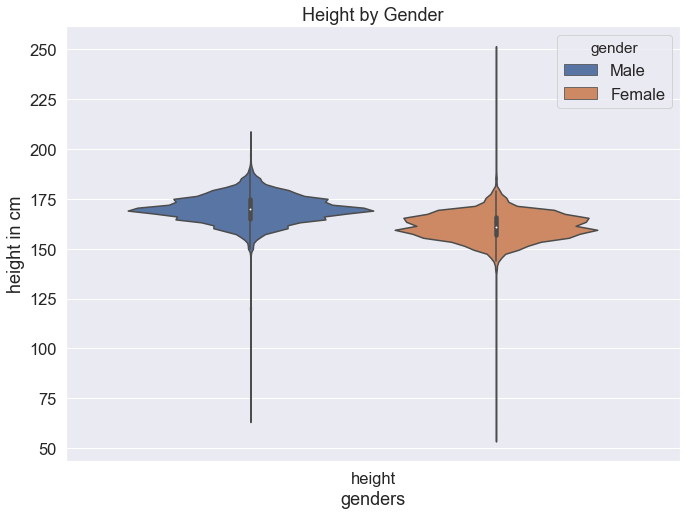

In [85]:
sns.violinplot(x='variable', y='value', hue='gender', data=melt_df)
plt.title('Height by Gender')
plt.xlabel("genders")
plt.ylabel("height in cm")
plt.show()

### Question 12 (1.5pts): Calculate and plot a correlation matrix using the Spearman's rank correlation coefficient. Which pair of features has the strongest Spearman correlation? (Use the initial dataset (non-filtered)).
    - To understand the features better, you can create a matrix of the correlation coefficients between the features. 
    - Plot a correlation matrix using [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). You can create the matrix using the standard `pandas` tools with the default parameters.

    (Hint: 1.Height,Weight: what is the correlation coefficient of Height and Weight?, find the correlation coefficient for all 6 pairs. State which pair has the strongest correlation.)

1. Height, Weight
2. Age, Weight
3. Cholesterol, Gluc
4. Cardio, Cholesterol
5. Ap_hi, Ap_lo
6. Smoke, Alco

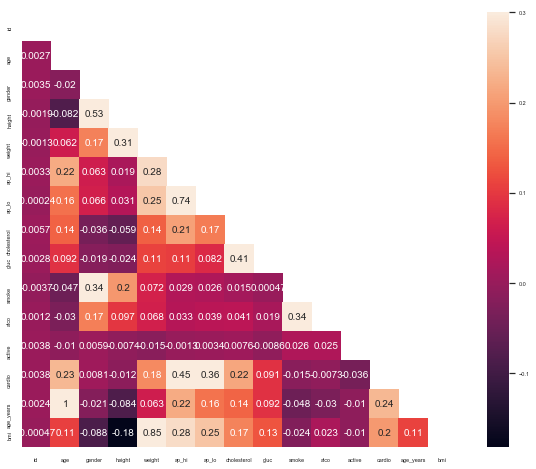

In [92]:
corr = df.corr(method ='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
     ax = sns.heatmap(corr, mask=mask, annot=True, annot_kws={"size": 10}, vmax=.3, square=True)

In [28]:
# add your explanation and code here

corr = df.corr(method ='spearman')

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '60px', 'font-size': '6pt'})\

#Height, Weight = 0.313569
#Age, Weight = 0.0615589
#Cholesterol, Gluc = 0.407803
#Cardio, Cholesterol = 0.215117
#Ap_hi, Ap_lo = 0.735436 STRONGEST CORR (at least of #1-6)
#Smoke, Alco = 0.340094

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
id,1,0.00268172,0.00350622,-0.0018865,-0.00129162,0.00325755,-0.000238178,0.00570591,0.00278945,-0.00369749,0.00121417,0.00376552,0.00380049,0.0023672,-0.000469568
age,0.00268172,1,-0.0201764,-0.0822923,0.0615589,0.219087,0.1567,0.140113,0.0917914,-0.0474714,-0.0300784,-0.010422,0.234429,0.998088,0.107621
gender,0.00350622,-0.0201764,1,0.533805,0.17248,0.0631735,0.0663741,-0.0357298,-0.0188664,0.338135,0.170966,0.00586567,0.00810949,-0.0206358,-0.0876138
height,-0.0018865,-0.0822923,0.533805,1,0.313569,0.0193813,0.0305338,-0.0589404,-0.0243691,0.197632,0.0966698,-0.00736692,-0.0123833,-0.0835943,-0.182523
weight,-0.00129162,0.0615589,0.17248,0.313569,1,0.277749,0.25442,0.137908,0.109901,0.0716756,0.0680878,-0.0148945,0.182701,0.0629564,0.848195
ap_hi,0.00325755,0.219087,0.0631735,0.0193813,0.277749,1,0.735436,0.208722,0.105334,0.0289286,0.0332428,-0.00126783,0.451885,0.220663,0.281087
ap_lo,-0.000238178,0.1567,0.0663741,0.0305338,0.25442,0.735436,1,0.167401,0.0824736,0.0261717,0.038862,0.00340149,0.362572,0.157794,0.250592
cholesterol,0.00570591,0.140113,-0.0357298,-0.0589404,0.137908,0.208722,0.167401,1,0.407803,0.0152196,0.0412854,0.00757317,0.215117,0.141957,0.174008
gluc,0.00278945,0.0917914,-0.0188664,-0.0243691,0.109901,0.105334,0.0824736,0.407803,1,0.000467966,0.0185844,-0.00860997,0.0914876,0.0916605,0.127856
smoke,-0.00369749,-0.0474714,0.338135,0.197632,0.0716756,0.0289286,0.0261717,0.0152196,0.000467966,1,0.340094,0.025858,-0.0154859,-0.0475322,-0.0242877


### Question 13 (0.5pts): Create a *count plot* using [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) with the age on the *X* axis and the number of people on the *Y* axis. (Use the initial dataset (non-filtered)).

Your resulting plot should have two columns for each age, corresponding to the number of people for each *cardio* class of that age(You calculated the age of the respondents in years earlier).

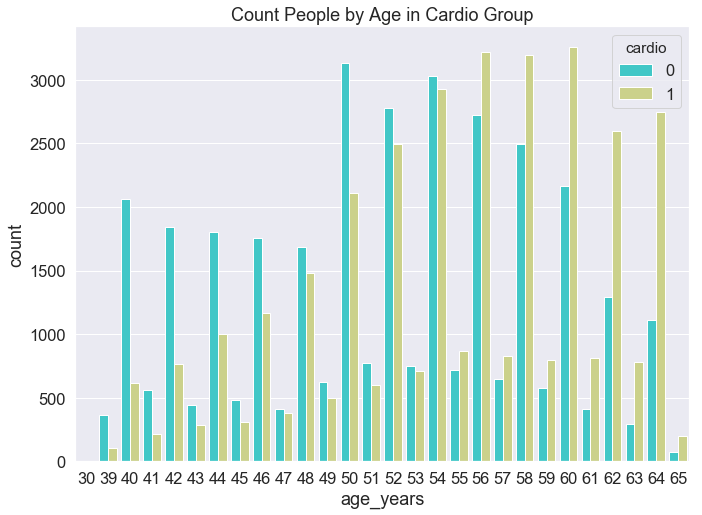

In [29]:
# add your explanation and code here
sns.countplot(x="age_years", hue="cardio", data=df, palette="rainbow")
plt.title('Count People by Age in Cardio Group')
plt.show()

----
## Part 2: Python/Analytics Learning

### **Q14** (3pts) There are may ways to keep oneself up to speed on their learning. Just like any topic, for Python learning you can listen to podcasts, subscribe to python developers' blogs, sign up for various newsletters. Share and discuss 3 different ways you are currently using/have identified to keep learning python. Give **specific** examples on what you learned. 

Responses like "I watch youtube videos" aren't sufficient. You can try your hand in using the STAR format (Situation, Task, Act, and Results). Share the situation leading to the learning. Please add what were you trying to solve, what did you do, and what are the results? 

If it is a podcast, give details on which podcast, why you are interested in this specific podcast, give at least one example episode that helped you discover/learn python related topic and explain what you learned. 

**Specific examples are required.** 

1. I forgot how to group the countplot by cardio group so I just read the seaborn documentation and followed an example using the titanic dataset. I google the documentation for packages a lot because it usually includes examples.

2. I wanted to create a heatmap that had the correlations printed in the squares for question 12. I read stack overflow to find several different methods of creating the heatmap I imagined before creating my own with the given dataset. I made the heatmap with seaborn first but I think the second one turned out better.

3. I found an article for python violin plots to help me understand the results in the previous homework. I read a lot of how-to articles on homework topics to help me understand the visualizations I'm creating.

----
## Part 3: Bonus Section: `sqlite3` library and writing an efficient function

### Part 3.1 Bonus: (1points) Querying SQLite database using `sqlite3` library
Please refer to Chapter 6 in "Python for Data Analysis" by Wes McKinney.

### **Q15.1** Connect to the flight.db and find out which tables are available in the dbs.


In [30]:
# Answer Bonus15.1
import sqlite3
 
con = sqlite3.connect('flights.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('airports',), ('airlines',), ('routes',)]


### **Q15.2** Create a query to find out how many airports there are in the United States?

In [31]:
cursor.execute("SELECT sql FROM sqlite_master WHERE tbl_name = 'airports' AND type = 'table'")
print(cursor.fetchall())

[('CREATE TABLE airports (\n[index] INTEGER,\n  [id] TEXT,\n  [name] TEXT,\n  [city] TEXT,\n  [country] TEXT,\n  [code] TEXT,\n  [icao] TEXT,\n  [latitude] TEXT,\n  [longitude] TEXT,\n  [altitude] TEXT,\n  [offset] TEXT,\n  [dst] TEXT,\n  [timezone] TEXT\n)',)]


In [32]:
df = pd.read_sql_query("select * from airports limit 5;", con)
df

,index,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10,U,Pacific/Port_Moresby
1,1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.7887,20,10,U,Pacific/Port_Moresby
2,2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10,U,Pacific/Port_Moresby
3,3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10,U,Pacific/Port_Moresby
4,4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.22005,146,10,U,Pacific/Port_Moresby


In [33]:
# Answer Bonus15.2
cursor.execute("SELECT COUNT(DISTINCT name) FROM airports WHERE country = 'United States';")
print(cursor.fetchall())

[(1667,)]


### **Q15.3** How many unique airlines travel from source = "AAR"? Use a query and `pd.pd.read_sql_query`


In [34]:
df = pd.read_sql_query("select * from airlines limit 5;", con)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N


In [35]:
# Answer Bonus15.3
df = pd.read_sql_query("select * from airlines WHERE icao ='AAR';", con)
df

#1 airline

,index,id,name,alias,iata,icao,callsign,country,active
0,27,28,Asiana Airlines,\N,OZ,AAR,ASIANA,Republic of Korea,Y


In [36]:
df = pd.read_sql_query("select COUNT(*) AS 'Unique AAR' from airlines WHERE icao ='AAR';", con)
df

#1 airline

,Unique AAR
0,1


### **Q15.4** How many unique airlines travel from source = "AAR"? Use `collections.Counter`


In [37]:
# Answer Bonus15.4
from collections import Counter

cursor.execute("select * from airlines;")
result = cursor.fetchall()

type(result)

list

In [38]:
cnt = Counter()
for i in ['AAR']:
     cnt[i] += 1
cnt

Counter({'AAR': 1})

### Part 3.2 Efficient function coding 

###  **Q16** (4pts) Write a function that behaves like the `sklearn.metrics.train_test_split()` function.


16.1 Identify the characteristics of `sklearn.metrics.train_test_split()` function.

16.2 Write a function from scratch to mimic 

16.3 Split the sonar data into 30% test, 70%train using your function, random_state = 531.

16.4 time your function and compare to the time it takes to run `sklearn.metrics.train_test_split()` function 

16.5 which one is faster, why?

In [39]:
# Answer Bonus16.1
# sklearn.metrics.train_test_split() splits arrays or matrices into random train and test subsets
# random_state allows for reproducable result
# test_size is percentage of data used for test
# shuffle is defaulted to true -- the data is shuffled before splitting

In [40]:
data = pd.read_csv('sonar_all_data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [50]:
# Answer Bonus16.2
#this doesn't shuffle data; it only splits
import timeit

def split(data):
    train = data.sample(frac=0.7, random_state=531)
    test = data.drop(train.index)
    return train, test

start_time = timeit.default_timer()

train, test = split(data)

elapsed = timeit.default_timer() - start_time
elapsed

0.001854000000008682

In [51]:
# Answer Bonus16.3
print(train.head())
print(test.head())

         0       1       2       3       4       5       6       7       8   \
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
164  0.0163  0.0198  0.0202  0.0386  0.0752  0.1444  0.1487  0.1484  0.2442   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
61   0.0135  0.0045  0.0051  0.0289  0.0561  0.0929  0.1031  0.0883  0.1596   
69   0.0216  0.0215  0.0273  0.0139  0.0357  0.0785  0.0906  0.0908  0.1151   

         9  ...      51      52      53      54      55      56      57  \
7    0.2838 ...  0.0081  0.0120  0.0045  0.0121  0.0097  0.0085  0.0047   
164  0.2822 ...  0.0077  0.0026  0.0031  0.0083  0.0020  0.0084  0.0108   
206  0.2354 ...  0.0086  0.0046  0.0126  0.0036  0.0035  0.0034  0.0079   
61   0.1908 ...  0.0037  0.0084  0.0102  0.0096  0.0024  0.0037  0.0028   
69   0.0973 ...  0.0140  0.0044  0.0052  0.0073  0.0021  0.0047  0.0024   

         58      59  60  
7    0.0048  0.0053   R  
164  0.0083  0.0033   

In [52]:
import sklearn.model_selection as model_selection

In [53]:
# Answer Bonus16.4

X = data[data.columns[0:59]]
y = data[data.columns[60]]

start_time = timeit.default_timer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=531)

elapsed = timeit.default_timer() - start_time
elapsed

0.0016830999999797314

In [54]:
# Answer Bonus16.5
#SKLEARN was faster

**Graded Assignment 4 COMPLETE!**